# Problem Set 5.1.5—ANSWERS. Failing to "Converge" or Catch Up to America (and the Rest of the Global North)

These notebook assignments are a required part of the course.

Collaborating on the notebooks is more than okay—it is encouraged! Seek help from a classmate or an instructor or a roommate or a passerby when you get stuck! (Explaining things is beneficial, too—the best way to solidify your knowledge of a subject is to explain it.) 

But the work should be your own.

No cutting-&-pasting from others' notebooks, please! We want you to learn this stuff, and your fingers typing every keystroke is an important way of building muscle memory here.

In this notebook, you will attempt to assess whether and how much engrossment of natural resources by the global north since the start of the commercial revolution era in 1500 has played an important role in the rise of global inequality.

Let us get started!

&nbsp;

## 1. Preliminaries: Computing Environment

First, we set up the computing environment with the libraries we need: 

In [1]:
# 5.1.5.1.1 set up the computing environment: ensure that graphs
# appear inline in the notebook & not in extra windows:

%matplotlib inline

In [2]:
# 5.1.5.1.2 set up the computing environment: import standard libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# 5.1.5.1.3 set up the computing environment: additional library: linear models:

!pip install linearmodels
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
import statistics as stat

## 2. Does Technology Flow—Get Transferred—Across Countries Fast Enough for the Poor to Not Only Grow, But Also Catch Up to the Rich?

### A. The Argument for Convergence

The argument for "convergence" of economies has two parts. 

The first, less important, part is that economies should converge in their savings-investment rates and in their population and labor force growth rates. Countries with low savings-investment rates have low capital intensity. Countries with high population and labor force growth rates have low capital intensity. The factors reinforce each other. And countries with low capital intensity are poor.

As countries grow absolutely richer, their relative price structures see the price of manufactured investment goods fall, and so the same share of income saved translates into a greater real share of investment in spending: the same savings effort translates into a greater investment outcome. Moreover, richer countries find it much easier to maintain the security of property, which raises the incentive to save and invest as well. This has countries grow absolutely richer, their real savings-investment rates converge. And this convergence removes one source of low capital intensity, and poverty.

As countries grow absolutely richer, infant mortality rates fall and literacy rates rise. This leads countries to go through the "demographic transition": a shift from fertility rates above 40 per thousand as couples seek to have more children in the hopes that some will survive down to about 10 per thousand. Before the demographic transition begins populations grow very very slowly because of high death rates. In the middle of the process population growth rates are high, hence countries' levels of capital intensity are low as savings are devoted to simply equipping the growing labor force with tools rather than increasing the number and value of tools at the disposal of each worker. But after countries have completed the demographic transition they have converged in their rates of population and labor-force growth to values near zero population growth. And this convergence removes one source of low capital intensity, and poverty.

More important than convergence in capital intensity and thus in this factor's effect on relative incomes—so the argument goes—is convergence in the level of technology deployed in different economies. Development is easier than discovery, and deployment is easier than development. Discovery must take place, overwhelmingly, in the leading edge growth poles of the world economy. But development can take place in any of a wide range of places with sufficiently developed communities of engineering practice. And deployment can take place anywhere that people are literate, experienced with the use of modern technology, and confident that their effort at deploying technologies in production will be satisfactorily rewarded. 

Once, therefore, countries' economies have developed sufficient degrees of literacy and sufficiently strong communities of engineering practice to begin to transfer technology from abroad and deploy it in their economies—once they have made what Walt Rostow used to analogize as the "takeoff" into self-sustained growth, first industrial growth and then modern economic growth—there are then very powerful economic incentives for them to adopt, adopt, and deploy modern technologies for manipulating nature and productively organizing humans, and hence their levels of efficiency of labor should rapidly converge to the standard of economic leaders.

That, at any event, is the theory.

&nbsp;

### B. Will Baumol's 1986 Analysis

Let us begin with the results from a paper: **Will Baumol** (1986): _Productivity, Convergence, & Welfare: What Does the Long-Run Data Show?_ <<http://piketty.pse.ens.fr/files/Baumol1986.pdf>>—the paper to which I took great exception back at the start of my career. Will Baumol argued that if we looked at the world since 1870, and if we looked at the countries that had then managed the takeoff into self sustained growth, the overwhelming message of the data was one of "convergence". I thought that if you looked at the data more carefully, that Baumol was wrong.

What were the issues? Begin by running the code cell below to start the process of downloading the data as things stood when Baumol wrote, and looking around:

In [4]:
# 5.1.5.2.B.1 download the convergence data & look around
#
# start by reading in the data from the internet:

convergence_df = pd.read_csv('https://delong.typepad.com/files/delong-1989-convergence-replication-2.csv')

convergence_df

,country,income_1870,income_1979,sample,ln_income_1870,ln_income_1979,ln_income_growth_1870_1979
0,Australia,5950,24700,MS,8.691146,10.114559,1.423412
1,United Kingdom,5720,21100,MS,8.651724,9.957028,1.305304
2,Belgium,4420,24000,MS,8.393895,10.085809,1.691914
3,Switzerland,6710,41100,MS,8.811354,10.623763,1.812409
4,Netherlands,4990,27000,MS,8.515191,10.203592,1.688401
5,United States,3740,29900,MS,8.226841,10.305614,2.078773
6,Canada,2870,27100,MS,7.962067,10.207289,2.245222
7,Denmark,3600,27800,MS,8.188689,10.232791,2.044102
8,West Germany,3850,27800,MS,8.255828,10.232791,1.976963
9,Austria,3230,24400,MS,8.080237,10.102338,2.022101


Here we have Angus Maddison's estimates for the first sixteen and my estimates for the rest of countries'—as they stood back in the 1980s: East Germany was then a separate country from West Germany—levels of real income per capita in 1870 and 1979. We also have a column telling whether the country is in the sixteen countries for which estimates had then been made by Angus Maddison—"MS"—or in the auxilliary seven—"AS". And we have columns for the natural log of income in 1870, the natural log of income in 1979, and a final column for the change from 1870 to 1979 in the natural log—that is, 109 times the average annual growth rate of income per capita.

Next, let us replicate Baumol's analysis.

First, drop the "auxilliary seven" observations that were not in Baumol's analysis from our view:

In [5]:
# 5.1.5.2.B.2 build a new dataframe with only Maddison's Sixteen

indexNames = convergence_df[ convergence_df['sample'] == 'AS' ].index  #find the observations in the "auxilliary seven" sample
convergence_baumol_df = convergence_df.drop(indexNames) # drop those auxilliary seven observations from the convergence_baumol_df dataframe

convergence_baumol_df # print out the Baumol sample observations to check that nothing has gone wrong

,country,income_1870,income_1979,sample,ln_income_1870,ln_income_1979,ln_income_growth_1870_1979
0,Australia,5950,24700,MS,8.691146,10.114559,1.423412
1,United Kingdom,5720,21100,MS,8.651724,9.957028,1.305304
2,Belgium,4420,24000,MS,8.393895,10.085809,1.691914
3,Switzerland,6710,41100,MS,8.811354,10.623763,1.812409
4,Netherlands,4990,27000,MS,8.515191,10.203592,1.688401
5,United States,3740,29900,MS,8.226841,10.305614,2.078773
6,Canada,2870,27100,MS,7.962067,10.207289,2.245222
7,Denmark,3600,27800,MS,8.188689,10.232791,2.044102
8,West Germany,3850,27800,MS,8.255828,10.232791,1.976963
9,Austria,3230,24400,MS,8.080237,10.102338,2.022101


Next, draw the graph: the natural log of real income per capita on the horizontal axis, the 109-year change in the value of the log on the vertical axis, with the line of least-squares best fit running through the scatter:

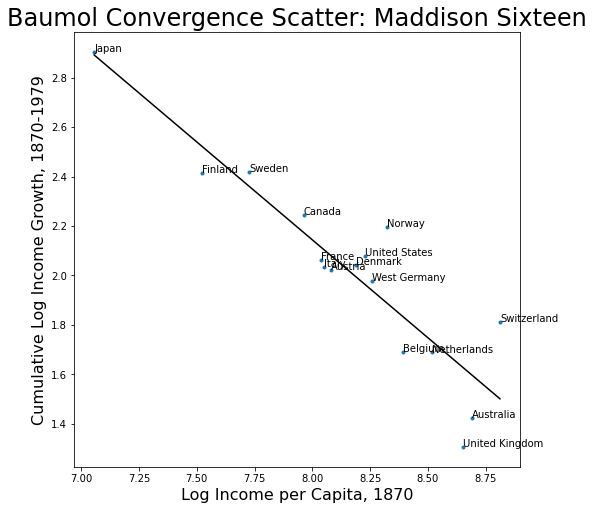

In [6]:
# 5.1.5.2.B.3

# tell python to expect figures to come 
# by initializing the python objects to hold the figures...

fig, ax = plt.subplots(figsize=(8,8)) 

# create the figure with average expropriation risk on the horizontal and
# 1995 per capita real income on the vertical axis

ax.scatter(convergence_baumol_df['ln_income_1870'], convergence_baumol_df['ln_income_growth_1870_1979'], marker='.')

# now loop through the data[points in the figure, annotating each
# data point with a three letter code ('Threeletterabbrevation') identifying the 
# country refered to:

for i, txt in enumerate(convergence_baumol_df['country']):
    ax.annotate(txt, (convergence_baumol_df['ln_income_1870'].iloc[i], convergence_baumol_df['ln_income_growth_1870_1979'].iloc[i]))
    

# draw a straight least-squares fit line through the data

ax.plot(np.unique(convergence_baumol_df['ln_income_1870']),
    np.poly1d(np.polyfit(convergence_baumol_df['ln_income_1870'], convergence_baumol_df['ln_income_growth_1870_1979'], 1))(np.unique(convergence_baumol_df['ln_income_1870'])),
    color='black')

# set the figure labels, and show the figure:


ax.set_xlabel('Log Income per Capita, 1870', size=16)
ax.set_ylabel('Cumulative Log Income Growth, 1870-1979', size=16)
ax.set_title('Baumol Convergence Scatter: Maddison Sixteen', size=24)
plt.show()

What is the slope of this best-fit line? We tell python that we want it to run a regression analysis—find the equation of the line of best fit, with the independent variable on the left-hand side of the equation being cumulative growth from 1870-1979, and the dependent variables on the right-hand side of the equation being a contant term—a term that is equal to one for all observations—and the natural log of real income per capita in 1870. Python then spits out an "OLS Regression Results" table. If you understand it, good. If not, the numbers we are looking for are the two numbers in the first column in the second panel of the Results table: the 8.4873 for the constant term, and the -0.7979 for the natural log of real income per capita in 1870 term:

In [7]:
# 5.1.5.2.B.4

convergence_baumol_df['constant'] = 1

print('REGRESSION OF CUMULATIVE GROWTH ON INITIAL INCOME')

print(sm.OLS(endog=convergence_baumol_df['ln_income_growth_1870_1979'], 
                exog=convergence_baumol_df[['constant', 'ln_income_1870']], 
                missing='drop').fit().summary())

REGRESSION OF CUMULATIVE GROWTH ON INITIAL INCOME
                                OLS Regression Results                                
Dep. Variable:     ln_income_growth_1870_1979   R-squared:                       0.829
Model:                                    OLS   Adj. R-squared:                  0.817
Method:                         Least Squares   F-statistic:                     67.75
Date:                        Fri, 19 Mar 2021   Prob (F-statistic):           9.81e-07
Time:                                12:44:57   Log-Likelihood:                 6.8728
No. Observations:                          16   AIC:                            -9.746
Df Residuals:                              14   BIC:                            -8.200
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.97

/Users/braddelong/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


The "8.4873" means that if we were to plot another observation, and if that additional observation were to fall along this line of best fit, and if the ln_income_1870 value for that observation were 0, then the ln_income_growth_1870_1979 value for that observation would be 8.4873. The "-0.7929" means that for each unit that ln_income_1870 increases, the value of ln_income_growth_1870_1979 on the best-fit line decreases by 0.7929. The equation of the best-fit line equation is thus:

>$ g = 8.4873 -0.7929\ln(y_{1870}) $

where g is cumulative growth—the change in the natural log of real income per capita over 1870-1979, 109 times the average annual growth rate—and $ y_{1870} $ is the level of real income per capita in 1870.

The best-fit line tells us that there is convergence, and that there is almost complete convergence: a country 10% poorer in 1870 has cumulative growth 7.929% greater over 1870-1979. Thus by 1979 we have had almost complete convergence among Maddison's 16: only one-fifth of differentials in real income per capita that existed in this sample in 1870 were still present in 1979.

That would seem to be very powerful evidence that the theory is right: that economies—once they have becom educated enough and stable enough and integrated enough into the world's communications and trade networks and have enough engineers—become more and more alike in levels of technology, savings-investment rates, and population growth rates over time. And so there would seem to be very strong tendency to "converge" in living productivity levels, living standards, and per capita income.

&nbsp;

## 3. DeLong's Critique

The first question I asked, back when I saw Baumol's paper back in 1986, was: How had Maddison selected his sixteen? 

Japan was not included  because there were clear judgments back in 1870 that it had already undergone its takeoff into Rostovian self-sustained growth. Japan was selected because it had grown rich between 1870 and 1979, and back in 1979 only those countries that were rich had had economic historians studying their past in sufficient detail to construct the data on which Maddison built his studies. Japan did not belong in Maddison's sample, I opined at a lunch at the Harvard Faculty Club. 

Moreover, I said, all of the old estimates were very rough and inaccurate—and if you make an error in your estimate of 1870 that makes it 10% higher than it should be, the fact that you construct the growth rate by subtracting the log of income then from income now means that you automatically bias your regression coefficient toward -1. Your regression coefficient is then a weighted average of (a) a -1 that is the automatic arithmetic consequence of your errors in your 1870 estimates, and (b) the true coefficient you want to discovery, with the -1 being weighted higher the more error there is in your past estimates. And—I said (I was preaching and ranting by then)—there were a bunch of countries that people were confident back in 1870 were "modern" and had made the Rostovian takeoff. They should be in the sample too for a proper analysis!

Senior professors at the lunch table, David Landes and Peter Temin, told me: Write this up and send it to the _American Economic Review_, which had published Baumol's piece. So I did. And they took it. And Baumol replied "mea culpa"—that he had been wrong, and that I was right. Very much a gentleman was Will Baumol.

First of all, therefore, let us take our sample—Maddison's sixteen plus the auxilliary seven—and drop Japan from the sample.

In [8]:
# 5.1.5.3.1

indexNames = convergence_df[ convergence_df['country'] == 'Japan' ].index
# Delete these row indexes from dataFrame
convergence_once_rich_df = convergence_df.drop(indexNames)

convergence_once_rich_df

,country,income_1870,income_1979,sample,ln_income_1870,ln_income_1979,ln_income_growth_1870_1979
0,Australia,5950,24700,MS,8.691146,10.114559,1.423412
1,United Kingdom,5720,21100,MS,8.651724,9.957028,1.305304
2,Belgium,4420,24000,MS,8.393895,10.085809,1.691914
3,Switzerland,6710,41100,MS,8.811354,10.623763,1.812409
4,Netherlands,4990,27000,MS,8.515191,10.203592,1.688401
5,United States,3740,29900,MS,8.226841,10.305614,2.078773
6,Canada,2870,27100,MS,7.962067,10.207289,2.245222
7,Denmark,3600,27800,MS,8.188689,10.232791,2.044102
8,West Germany,3850,27800,MS,8.255828,10.232791,1.976963
9,Austria,3230,24400,MS,8.080237,10.102338,2.022101


We now have a sample that I call the once-rich twenty-two. They are all economies that were, as of 1870, in the groove: western European economies that had clearly grasped the opportunities for human economic betterment that had been offered by the Imperial-Commercial Revolution, and that also had grasped or were grasping at the worst many of the opportunities for human economic betterment that had been offered by the Industrial Revolution. All had close enough trade and communication links with the heart of industrial civilization as it then stood. Perhaps it should be the once-rich twenty-five: the Czech Republic, Hungary, and Uruguay. Perhaps not. But industrialization had not yet taken hold in any of Prague, Budapest, or Montevideo as of 1870.

Let us know repeat for the once-rich twenty-two sample the analysis that Baumol performed on Maddison's sixteen:

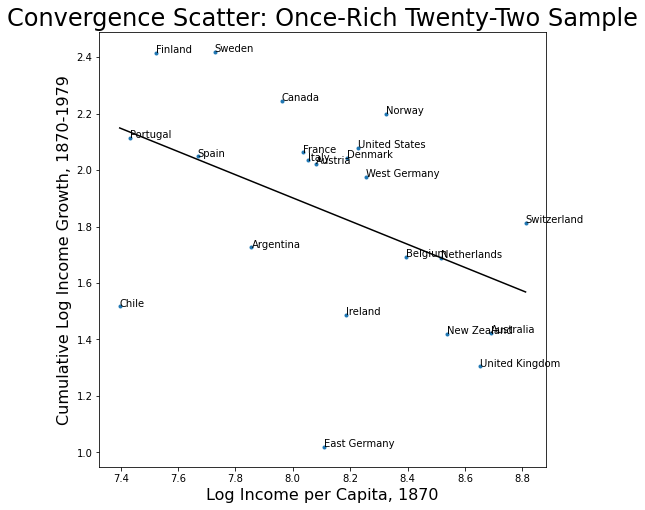

In [9]:
## 5.1.5.3.2

# tell python to expect figures to come 
# by initializing the python objects to hold the figures...

fig, ax = plt.subplots(figsize=(8,8)) 

# create the figure with average expropriation risk on the horizontal and
# 1995 per capita real income on the vertical axis

ax.scatter(convergence_once_rich_df['ln_income_1870'], convergence_once_rich_df['ln_income_growth_1870_1979'], marker='.')

# now loop through the data[points in the figure, annotating each
# data point with a three letter code ('Threeletterabbrevation') identifying the 
# country refered to:

for i, txt in enumerate(convergence_once_rich_df['country']):
    ax.annotate(txt, (convergence_once_rich_df['ln_income_1870'].iloc[i], convergence_once_rich_df['ln_income_growth_1870_1979'].iloc[i]))
    

# draw a straight least-squares fit line through the data

ax.plot(np.unique(convergence_once_rich_df['ln_income_1870']),
    np.poly1d(np.polyfit(convergence_once_rich_df['ln_income_1870'], convergence_once_rich_df['ln_income_growth_1870_1979'], 1))(np.unique(convergence_once_rich_df['ln_income_1870'])),
    color='black')

# set the figure labels, and show the figure:


ax.set_xlabel('Log Income per Capita, 1870', size=16)
ax.set_ylabel('Cumulative Log Income Growth, 1870-1979', size=16)
ax.set_title('Convergence Scatter: Once-Rich Twenty-Two Sample', size=24)
plt.show()

In [10]:
# 5.1.5.3.3

convergence_once_rich_df['constant'] = 1

print('CONVERGENCE REGRESSION: ONCE-RICH TWENTY-TWO')

print(sm.OLS(endog=convergence_once_rich_df['ln_income_growth_1870_1979'], 
                exog=convergence_once_rich_df[['constant', 'ln_income_1870']], 
                missing='drop').fit().summary())

CONVERGENCE REGRESSION: ONCE-RICH TWENTY-TWO
                                OLS Regression Results                                
Dep. Variable:     ln_income_growth_1870_1979   R-squared:                       0.196
Model:                                    OLS   Adj. R-squared:                  0.156
Method:                         Least Squares   F-statistic:                     4.887
Date:                        Fri, 19 Mar 2021   Prob (F-statistic):             0.0389
Time:                                12:44:58   Log-Likelihood:                -6.5494
No. Observations:                          22   AIC:                             17.10
Df Residuals:                              20   BIC:                             19.28
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--

The equation of the best-fit line equation for the once-rich twenty-two sample is thus:

>$ g = 5.1833 -0.4103\ln(y_{1870}) $

where g is cumulative growth—the change in the natural log of real income per capita over 1870-1979, 109 times the average annual growth rate—and $ y_{1870} $ is the level of real income per capita in 1870.

The best-fit line tells us that a country 10% poorer in 1870 has cumulative growth 4.103% greater over 1870-1979. "Convergence" is far from for this sample in 1979: fully three-fifths of log real income per capita differentials in 1870 are still present in 1979.

Moreover, a considerable part of this apparent convergence is statistical illusion. Suppose that our estimate of log income back in 1870 is measured with an error $ \eta $:

>$ \ln(y_{1870}) = \ln(y^T_{1870}) + \eta $

and that the true statistical relationship—which we do not see, because we do not see accurately the true level of real income per capita in 1870:

>$ \ln(y_{1879}) - \ln(y^T_{1870}) = \alpha + \beta\ln(y^T_{1870}) + \epsilon $

What are the consequences? Let us conduct a computational experiment to see:

&nbsp;

## 4. A Computational Experiment

Suppose that there were no convergence—that the true relationship between true log income per capita in 1870 and subsequent growth were zero. But we, instead, estimate using measured 1870 income per capita. We thus estimate not the true $ \beta $ (which equals zero) but rather $ \beta^* $/:

>$ \ln(y_{1879}) - \ln(y^T_{1870}) = \alpha + \epsilon $

>$ \ln(y_{1879}) - (\ln(y^T_{1870}) + \eta) = \alpha + \beta^*(\ln(y^T_{1870}) + \eta) + \epsilon $

What will we find?

Let us see. We have the mean level of log income per capita in 1870: 8.2. We have the average cumulative growth in the log of income from 1870 to 1989: 1.8. We also have (a) the spread of 1870 log income levels around their mean, (b) factors affecting cumulative 1870-1979 growth that are uncorrelated with initial income, and (c) the typical error with which both 1870-1979 cumulative growth and initial income level in 1870 are mearsured, which we call $ \eta $.

Let us suppose that the standard deviations of the true value of $ \ln(y^T_{1870}) $ about its mean, of the summed other factors besides initial income that determine cumulative growth, and of the error with which 1870 income is measured $ \eta $ are all 0.2: we call these three quantities sigma_y, sigma_epsilon, and sigma_eta, respectively. And let us then see what we expect to get if we run Baumol's analysis in the case in which the true slope coefficient $ \beta = 0 $, in which there is no "convergence" going on as well.

To start the analysis, we first we need to import python's random variable module:

In [11]:
import random as rd

Next, assign the averages of the log of real income per capita in 1870 and subsequent cumulative growth to their actual historical averages for trhe once-rich twenty-two sample:

In [12]:
mean_y_1870 = 8.2
mean_g = 1.8

Next, set the standard deviations of the dependent and random variables we will need to their values:

In [13]:
sigma_y = 0.2
sigma_eta = 0.2
sigma_epsilon = 0.2

Now construct 22 artificial datapoints:

In [14]:
y_constructed = []
g_constructed = []

for i in range(22):
    eta = rd.gauss(0, sigma_eta)
    y_constructed = y_constructed + [mean_y_1870 + rd.gauss(0, sigma_y) + eta] 
    g_constructed = g_constructed +   [mean_g  + rd.gauss(0, sigma_epsilon) - eta]
    
constructed_data = [y_constructed, g_constructed]

scratch_df = pd.DataFrame(constructed_data)

constructed_df = scratch_df.transpose()
constructed_df.columns = ['ln_income_1870', 'ln_income_growth_1870_1979']

And perform the same analyses as we performed above on the actual, historical data.

First, plot the growth-and-initial-income scatter:

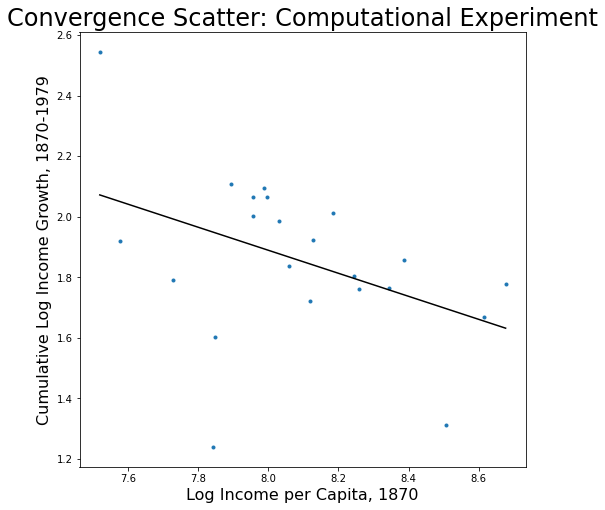

In [15]:
# tell python to expect figures to come 
# by initializing the python objects to hold the figures...

fig, ax = plt.subplots(figsize=(8,8)) 

# create the figure with average expropriation risk on the horizontal and
# 1995 per capita real income on the vertical axis

ax.scatter(constructed_df['ln_income_1870'], constructed_df['ln_income_growth_1870_1979'], marker='.')

# now loop through the data[points in the figure, annotating each
# data point with a three letter code ('Threeletterabbrevation') identifying the 
# country refered to:

# draw a straight least-squares fit line through the data

ax.plot(np.unique(constructed_df['ln_income_1870']),
    np.poly1d(np.polyfit(constructed_df['ln_income_1870'], constructed_df['ln_income_growth_1870_1979'], 1))(np.unique(constructed_df['ln_income_1870'])),
    color='black')

# set the figure labels, and show the figure:


ax.set_xlabel('Log Income per Capita, 1870', size=16)
ax.set_ylabel('Cumulative Log Income Growth, 1870-1979', size=16)
ax.set_title('Convergence Scatter: Computational Experiment', size=24)
plt.show()

Next run the regression analysis:

In [16]:
constructed_df['constant'] = 1

print('CONVERGENCE REGRESSION: COMPUTATIONAL EXPERIMENT')

results = sm.OLS(endog=constructed_df['ln_income_growth_1870_1979'], 
                exog=constructed_df[['constant', 'ln_income_1870']], 
                missing='drop')

print(results.fit().summary())
print('   ')
print('   ')
print('estimated β coefficient = ', results.fit().params[1])

CONVERGENCE REGRESSION: COMPUTATIONAL EXPERIMENT
                                OLS Regression Results                                
Dep. Variable:     ln_income_growth_1870_1979   R-squared:                       0.179
Model:                                    OLS   Adj. R-squared:                  0.138
Method:                         Least Squares   F-statistic:                     4.349
Date:                        Fri, 19 Mar 2021   Prob (F-statistic):             0.0500
Time:                                12:44:59   Log-Likelihood:              -0.068086
No. Observations:                          22   AIC:                             4.136
Df Residuals:                              20   BIC:                             6.318
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975

Did you find a negative relation between the initial _estimated_ level of real income per capita in 1870 and cumulative growth since _even though there was actually no convergence at all at work in the system_?

Let's be more systematic: let's calculate not just one computational experiment, but 10000. And let us then plot the results. 1,000 counterfactual worlds, with 10,000 sets of fictitious countries growing from 1870-1979, with no convergence—but with negatively correlated errors between cumulative growth and initial income.

It is convenient to first define a _function_ to create the counterfactual data, conduct the regression analysis, and then return as its output the value of the estimated $ \beta $ coefficient. The code cell below defines this "monte_carlo_run_fn" function. It will have, as its arguments, all of the parameters needed to construct the artificial data—and those parameters will be set to the same values as in the computation above if their values are not specifically passed to the function:

In [17]:
def monte_carlo_run_fn(mean_y_1870 = 8.2, mean_g = 1.8, sigma_y = 0.2, sigma_eta = 0.2, sigma_epsilon = 0.2):
    import random as rd
    y_constructed = []
    g_constructed = []

    for i in range(22):
        eta = rd.gauss(0, sigma_eta)
        y_constructed = y_constructed + [mean_y_1870 + + rd.gauss(0, sigma_y) + eta] 
        g_constructed = g_constructed +   [mean_g  + rd.gauss(0, sigma_epsilon) - eta]
    
    constructed_data = [y_constructed, g_constructed]

    scratch_df = pd.DataFrame(constructed_data)

    constructed_df = scratch_df.transpose()
    constructed_df.columns = ['ln_income_1870', 'ln_income_growth_1870_1979']
    constructed_df['constant'] = 1

    model = sm.OLS(endog=constructed_df['ln_income_growth_1870_1979'], 
                exog=constructed_df[['constant', 'ln_income_1870']], 
                missing='drop')

    result = model.fit().params[1]
    return result
    
print("estimated slope coefficient from artificial data =", monte_carlo_run_fn())

estimated slope coefficient from artificial data = -0.39694163209490346


Did this work? Did it print out a slope coefficient, estimated on the artificial data constructed?

Now it is convenient to write a function to (a) call the monte_carlo_run_fn a set number of times, and (b) plot a histogram of all of the estimated coefficients:

In [18]:
def monte_carlo_analysis(range_number = 10, mean_y_1870 = 8.2, mean_g = 1.8, sigma_y = 0.2, sigma_eta = 0.2, sigma_epsilon = 0.2):

    monte_carlo = []
    for j in range(range_number):
        monte_carlo = monte_carlo + [monte_carlo_run_fn(mean_y_1870, mean_g, sigma_y, sigma_eta, sigma_epsilon)]
    print('average estimated β* =', sum(monte_carlo)/len(monte_carlo))
    plt.hist(monte_carlo, bins=20)
    plt.show()

Now let us construct 1000 counterfactual possible worlds, each with its own once-rich twenty-two sample, and plot all of the 1000 estimated $ \beta $ coefficient that come from these counterfactual possible worlds. We do so by simply calling the wrapper function, telling it that we want the range_number not 10 but 1000 times, like this:

average estimated β* = -0.5047830836033634


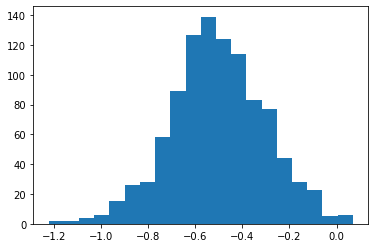

In [24]:
monte_carlo_analysis(1000)

If it is indeed the case that all of sigma_y, sigma_epsilon, and sigma_eta are 0.2—that half of our data's variation in the level in 1870 of log income per capita is in fact due to measurement error—then we would expect to find an estimated convergence-regression coefficient $ \beta = -0.5 $ _when there is no convergence operating in the system at all_.

Is that a reasonable assumption? It seems not unreasonable to me.

Hence I concluded that Baumol's study, when properly interpreted, does not show evidence that convergence had been operating from 1870-1979 _even among countries that were rich and seemed well-poised to deploy industrial technologies back in 1870_. Correcting for sample selection cut the magnitude of the slope coefficient from -0.8 down to -0.4. And then a plausible correction for errors-in-variables cut it down further in magnitude further to effectively zero. 

> $ \beta^* = \left(\frac{\sigma^2_y}{\sigma^2_y + \sigma^2_\eta}\right)\beta + \left(\frac{\sigma^2_\eta}{\sigma^2_y + \sigma^2_\eta}\right)(-1) $

> $ \beta = \left(\frac{\sigma^2_y + \sigma^2_\eta}{\sigma^2_y}\right)\beta^* + \left(\frac{\sigma^2_\eta}{\sigma^2_y}\right) $

In [20]:
# 5.1.5.2.B.1

# calculate variance of initial column

stat.variance(convergence_once_rich_df['ln_income_1870'])

0.16149235082582267

In [21]:
# 5.1.5.2.B.1

stat.variance(convergence_once_rich_df['ln_income_1979'])

0.16741670412621407

In [22]:
# 5.1.5.2.B.1

beta_hat = -0.4103

sigma_ratio = .5

beta = (beta_hat + sigma_ratio)/(1 - sigma_ratio)

sigma_ratio_list = []
beta_list = []
format_dict = {'sigma_ratio':'{0:.2f}',  'beta': '{0:.2f}'}


for i in range(20):
    sigma_ratio = i*0.05
    sigma_ratio_list = sigma_ratio_list + [sigma_ratio]
    beta_list = beta_list + [(beta_hat + sigma_ratio)/(1 - sigma_ratio)]

data = [sigma_ratio_list, beta_list]
df = pd.DataFrame(data)

df2 = df.transpose()
df2.columns = ['sigma ratio', 'beta']
df2

,sigma ratio,beta
0,0.00,-0.410300
1,0.05,-0.379263
2,0.10,-0.344778
3,0.15,-0.306235
4,0.20,-0.262875
5,0.25,-0.213733
6,0.30,-0.157571
7,0.35,-0.092769
8,0.40,-0.017167
9,0.45,0.072182


In [23]:
# 5.1.5.2.B.1

print(df.transpose())

       0          1
0   0.00  -0.410300
1   0.05  -0.379263
2   0.10  -0.344778
3   0.15  -0.306235
4   0.20  -0.262875
5   0.25  -0.213733
6   0.30  -0.157571
7   0.35  -0.092769
8   0.40  -0.017167
9   0.45   0.072182
10  0.50   0.179400
11  0.55   0.310444
12  0.60   0.474250
13  0.65   0.684857
14  0.70   0.965667
15  0.75   1.358800
16  0.80   1.948500
17  0.85   2.931333
18  0.90   4.897000
19  0.95  10.794000
